#### Import Library dan Data Set

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-05-12 07:34:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.19MB/s    in 67s     

2020-05-12 07:35:13 (4.62 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
DATA_DIR = '/tmp/rockpaperscissors/rps-cv-images'
IMG_ROWS = 150
IMG_COLS = 150
VAL_SPLIT=0.3
EPOCHS = 10
BATCH_SIZE = 32

#### Augmentasi & Split Data Set

In [7]:
datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   shear_range = 0.4,
                                   fill_mode = 'nearest',
                                   validation_split=VAL_SPLIT)

train_gen = datagen.flow_from_directory(DATA_DIR,
                                        target_size = (IMG_ROWS, IMG_COLS),
                                        batch_size=BATCH_SIZE,
                                        class_mode = 'categorical',
                                        shuffle=True,)

val_gen = datagen.flow_from_directory(DATA_DIR,
                                      target_size = (IMG_ROWS, IMG_COLS),
                                      batch_size=BATCH_SIZE,
                                      class_mode='categorical',
                                      shuffle=False,
                                      subset = 'validation')

Found 2188 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [0]:
NUM_TRAIN_SAMPLE = train_gen.n
NUM_VAL_SAMPLES = val_gen.n

#### Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       590080    
_________________________________________________________________
dropout (Dropout)            (None, 34, 34, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 295936)            0

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'RMSprop' ,
              metrics=['accuracy'])

#### Train Model

In [11]:
history = model.fit(train_gen,
          steps_per_epoch=NUM_TRAIN_SAMPLE // BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=val_gen,
          validation_steps=NUM_VAL_SAMPLES // BATCH_SIZE,
          verbose=2)

Epoch 1/10
68/68 - 21s - loss: 3.0344 - accuracy: 0.4407 - val_loss: 0.8777 - val_accuracy: 0.5672
Epoch 2/10
68/68 - 21s - loss: 1.1421 - accuracy: 0.6308 - val_loss: 0.7823 - val_accuracy: 0.7094
Epoch 3/10
68/68 - 21s - loss: 0.6715 - accuracy: 0.7528 - val_loss: 0.6053 - val_accuracy: 0.7016
Epoch 4/10
68/68 - 21s - loss: 0.4898 - accuracy: 0.8247 - val_loss: 0.3065 - val_accuracy: 0.8969
Epoch 5/10
68/68 - 21s - loss: 0.3942 - accuracy: 0.8701 - val_loss: 0.5027 - val_accuracy: 0.8344
Epoch 6/10
68/68 - 21s - loss: 0.3258 - accuracy: 0.8961 - val_loss: 0.2644 - val_accuracy: 0.9094
Epoch 7/10
68/68 - 21s - loss: 0.2410 - accuracy: 0.9253 - val_loss: 0.1552 - val_accuracy: 0.9609
Epoch 8/10
68/68 - 21s - loss: 0.2168 - accuracy: 0.9402 - val_loss: 0.1066 - val_accuracy: 0.9703
Epoch 9/10
68/68 - 21s - loss: 0.3211 - accuracy: 0.9332 - val_loss: 0.1488 - val_accuracy: 0.9500
Epoch 10/10
68/68 - 21s - loss: 0.2567 - accuracy: 0.9337 - val_loss: 0.1855 - val_accuracy: 0.9375


#### Plot Accuracy & Loss

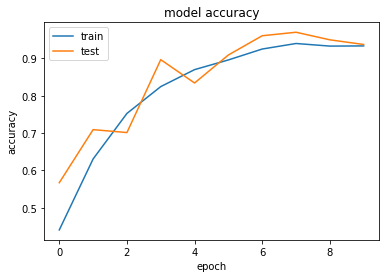

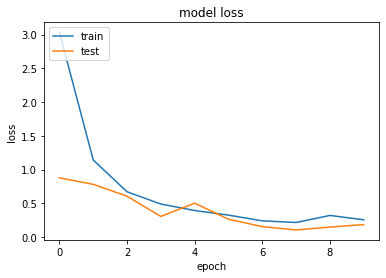

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Confusion Matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(val_gen, NUM_VAL_SAMPLES // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_gen.classes, y_pred))
print('Classification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[192   8  13]
 [  4 206   7]
 [  2   2 221]]
Classification Report
              precision    recall  f1-score   support

       Paper       0.97      0.90      0.93       213
        Rock       0.95      0.95      0.95       217
    Scissors       0.92      0.98      0.95       225

    accuracy                           0.95       655
   macro avg       0.95      0.94      0.94       655
weighted avg       0.95      0.95      0.94       655



#### Upload Image

Using TensorFlow backend.


Saving test.png to test (3).png
test.png
Rock


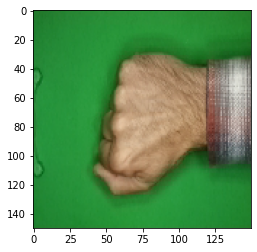

In [14]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')